<a href="https://colab.research.google.com/github/fathanick/Text-analytics-course-UII/blob/main/02_Text_clustering_hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Required Libraries**

First, ensure you have the required libraries. Install scikit-learn and scipy (for dendrogram plotting) if they’re not installed.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

**Step 2: Prepare the Dataset**

In [ ]:
documents = [
    "I love machine learning and data science.",
    "Data science is fascinating.",
    "Machine learning is a part of artificial intelligence.",
    "Python is a great programming language.",
    "Natural language processing with Python is amazing.",
    "Hierarchical clustering creates a tree of clusters.",
    "I enjoy learning about artificial intelligence and algorithms.",
    "The world of data science and AI is ever-growing.",
    "Python is often used for machine learning.",
    "Natural language processing is a subfield of AI."
]

**Step 3: Convert Text to Numerical Data**

Use TfidfVectorizer to convert text data into a format suitable for clustering.

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents).toarray()

**Step 4: Perform Hierarchical Clustering**

Now we’ll use AgglomerativeClustering with a specified number of clusters. In hierarchical clustering, you can either define the number of clusters you want or let the dendrogram decide the cluster cut-off.

In [ ]:
# Initialize hierarchical clustering model
num_clusters = 3  # You can change this number
hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')

# Fit model
hierarchical_clustering.fit(X)

AgglomerativeClustering(n_clusters=3)

**1. n_clusters=num_clusters:**

Specifies the number of clusters you want to create. For example, n_clusters=3 will result in three clusters.

**2. metric='euclidean':**

Defines the distance metric used to calculate the distance between data points. 'euclidean' calculates the straight-line distance, which is commonly used in clustering.

**3. linkage='ward':**

Determines the method of merging clusters. 'ward' minimizes the variance within clusters, producing compact, spherical clusters, which generally leads to well-separated groups. This linkage works particularly well with Euclidean distance.

**Step 5: Assign and View Clusters**

Add the cluster labels to each document and view the clusters.

In [ ]:
# Assign clusters to documents
clusters = hierarchical_clustering.labels_

# Display documents with their clusters
df = pd.DataFrame({'Document': documents, 'Cluster': clusters})
print(df)

                                            Document  Cluster
0          I love machine learning and data science.        1
1                       Data science is fascinating.        1
2  Machine learning is a part of artificial intel...        2
3            Python is a great programming language.        0
4  Natural language processing with Python is ama...        0
5  Hierarchical clustering creates a tree of clus...        0
6  I enjoy learning about artificial intelligence...        2
7  The world of data science and AI is ever-growing.        1
8         Python is often used for machine learning.        0
9   Natural language processing is a subfield of AI.        0


**Step 6: Visualize Clustering with a Dendrogram**

To understand the clustering structure, we’ll plot a dendrogram, which shows how clusters were merged.

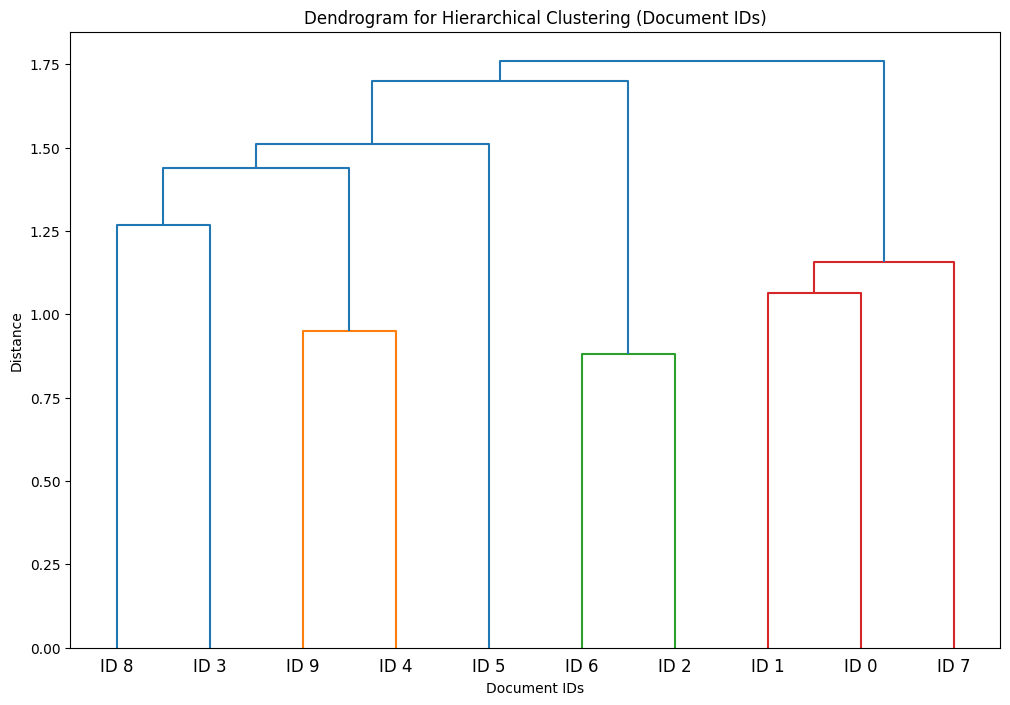

In [ ]:
# Compute the linkage matrix for the dendrogram
linked = linkage(X, method='ward')

# Plot the dendrogram with document ID labels
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           labels=[f"ID {i}" for i in range(len(documents))],
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering (Document IDs)')
plt.xlabel('Document IDs')
plt.ylabel('Distance')
plt.show()